In [3]:
import numpy as np
import glob
import librosa
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import os
from scipy.io import wavfile
from collections import defaultdict, Counter
from scipy import signal
import random
import sklearn
from unicodedata import normalize
import tensorflow as tf
from keras.layers import Dense
from keras import Input
from keras.engine import Model
from keras.utils import to_categorical
from keras.layers import Dense, TimeDistributed, Dropout, Bidirectional, GRU, BatchNormalization, Activation, LeakyReLU, LSTM, Flatten, RepeatVector, Permute, Multiply, Conv2D, MaxPooling2D
import keras.backend as K
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

sample_rate = 16000
n_mfcc = 100
n_fft = 400
hop_length = 160
my_path = "/home/mintai/capstone/snd/snd2/"

# Data set list, include (raw data, mfcc data, y data)
trainset = []
testset = []

# split each set into raw data, mfcc data, and y data
# STFT 한 것, CNN 분석하기 위해 Spectogram으로 만든 것, MF한 것, mel-spectogram 한 것
train_X = []
train_mfccs = []
train_y = []

test_X = []
test_mfccs = []
test_y = []

# 모든 음성파일의 길이가 같도록 후위에 padding 처리
pad1d = lambda a, i: a[0: i] if a.shape[0] > i else np.hstack((a, np.zeros(i-a.shape[0])))
pad2d = lambda a, i: a[:, 0:i] if a.shape[1] > i else np.hstack((a, np.zeros((a.shape[0], i-a.shape[1]))))

frame_length = 0.025
frame_stride = 0.0010

In [4]:

for filename in os.listdir(my_path + 'train/'):
    filename = normalize('NFC', filename)
    try:
        # wav 포맷 데이터만 사용
        if '.wav' not in filename in filename:
            continue
        
        wav, sr = librosa.load(my_path + 'train/' + filename, sr=16000)

        mfccs = librosa.feature.mfcc(wav, sr=16000, n_mfcc=100, n_fft=400, hop_length=160)
        mms = MinMaxScaler()
        print(mms.fit(mfccs))
        train_data_mmsed = mms.transform(mfccs)
        print(train_data_mmsed)
        padded_mfcc = pad2d(mfccs, 40)

        # 소리 별로 dataset에 추가 int(fn.split('-')[1])
        if filename.split('-')[1] == '1':
            trainset.append((padded_mfcc, 0))
        elif filename.split('-')[1] == '8':
            trainset.append((padded_mfcc, 1))
    except Exception as e:
        print(filename, e)
        raise

# 학습 데이터를 무작위로 섞는다.
random.shuffle(trainset)


for filename in os.listdir(my_path + 'test/'):
    filename = normalize('NFC', filename)
    try:
        # wav 포맷 데이터만 사용
        if '.wav' not in filename in filename:
            continue
        
        wav, sr = librosa.load(my_path + 'test/' + filename, sr=16000)
        
        mfccs = librosa.feature.mfcc(wav, sr=16000, n_mfcc=100, n_fft=400, hop_length=160)
        mms = MinMaxScaler()
        print(mms.fit(mfccs))
        test_data_mmsed = mms.transform(mfccs)
        print(test_data_mmsed)
        padded_mfcc = pad2d(mfccs, 40)

        # 소리 별로 dataset에 추가 int(fn.split('-')[1])
        if filename.split('-')[1] == '1':
            testset.append((padded_mfcc, 0))
        elif filename.split('-')[1] == '8':
            testset.append((padded_mfcc, 1))
    except Exception as e:
        print(filename, e)
        raise

# 학습 데이터를 무작위로 섞는다.
random.shuffle(testset)


MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.        ]
 [1.         0.99999994 0.9999999  ... 1.         1.         1.        ]
 [0.70139134 0.62345433 0.5892669  ... 0.59175044 0.57654464 0.5562371 ]
 ...
 [0.67134595 0.6285472  0.62407583 ... 0.63204426 0.6076339  0.5843757 ]
 [0.6797881  0.6308103  0.6254188  ... 0.6213722  0.60268426 0.61378014]
 [0.6634162  0.62799007 0.6342782  ... 0.6171203  0.6042397  0.57367617]]
MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.        ]
 [1.         1.         1.         ... 0.94620043 0.9478313  0.86430776]
 [0.8278367  0.8075331  0.81862605 ... 0.95898974 0.934914   0.9221253 ]
 ...
 [0.8622839  0.8178173  0.8239216  ... 0.8699202  0.8721593  0.85221356]
 [0.85562944 0.8186797  0.82692516 ... 0.8667723  0.87158906 0.84568626]
 [0.8591402  0.814733   0.82763773 ... 0.87418234 0.8795911  0.848831  ]]
MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.    

MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [0.7357079  0.71116424 0.7825545  ... 0.51724154 0.4905675  0.56316143]
 ...
 [0.7901716  0.7705844  0.8284312  ... 0.62923527 0.6505409  0.61980253]
 [0.77026576 0.76369643 0.81517583 ... 0.6485664  0.6391142  0.6147091 ]
 [0.7862163  0.77691346 0.82846    ... 0.6572928  0.6235001  0.60179514]]
MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.        ]
 [1.         1.         0.98343265 ... 0.9467653  1.         1.        ]
 [0.7783516  0.8164174  0.8219484  ... 0.82696223 0.80113363 0.73123693]
 ...
 [0.8108189  0.87764794 0.91410214 ... 0.9095083  0.8599623  0.76831144]
 [0.8156926  0.8747274  0.90620923 ... 0.90349346 0.8520665  0.76513743]
 [0.80992085 0.8696289  0.9042959  ... 0.9061944  0.8624017  0.7708023 ]]
MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.    

MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.        ]
 [1.         0.99999994 1.         ... 1.         1.         1.        ]
 [0.88229614 0.83425385 0.8362499  ... 0.76358443 0.7487474  0.7989032 ]
 ...
 [0.9085977  0.8544136  0.8412741  ... 0.85614216 0.83277094 0.85151774]
 [0.90524244 0.8673744  0.84701186 ... 0.8554514  0.8324415  0.8485304 ]
 [0.9025037  0.8676427  0.8463757  ... 0.85434645 0.8427775  0.8574424 ]]
MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.99999994 0.9999999  1.         ... 1.         1.         1.        ]
 [0.5238577  0.57529056 0.568454   ... 0.549104   0.56318355 0.56821096]
 ...
 [0.6947531  0.69669366 0.6358972  ... 0.6745908  0.6899978  0.7333613 ]
 [0.6806784  0.68845916 0.64041454 ... 0.675246   0.7016409  0.7072169 ]
 [0.69297844 0.6924636  0.64006126 ... 0.6662086  0.6999888  0.7129853 ]]
MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.    

MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.        ]
 [1.         1.         1.         ... 1.0000001  1.         1.        ]
 [0.83386475 0.7534051  0.7426307  ... 0.79608124 0.73791254 0.7626123 ]
 ...
 [0.81344867 0.77129316 0.78239214 ... 0.7681277  0.7454036  0.7784415 ]
 [0.8133862  0.76192176 0.78460574 ... 0.7651701  0.73475736 0.76153296]
 [0.84084225 0.77696925 0.7873623  ... 0.7641628  0.737369   0.7730387 ]]
MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.        ]
 [1.         1.         1.         ... 1.         0.99999994 1.        ]
 [0.89055836 0.6947767  0.63772696 ... 0.6404986  0.64200366 0.63483846]
 ...
 [0.8166896  0.70828336 0.6895282  ... 0.71648467 0.69750196 0.698374  ]
 [0.8120262  0.70533055 0.6840221  ... 0.70968664 0.6952144  0.6984354 ]
 [0.8043596  0.7082024  0.69024724 ... 0.7115843  0.694906   0.69305587]]
MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.    

MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.93015045 0.9829829  0.9868211  ... 0.99999994 1.         0.90893006]
 [0.94208133 0.9968685  1.         ... 0.8249677  0.8351162  0.8539038 ]
 ...
 [0.9260132  0.93406594 0.93106824 ... 0.8894706  0.8759579  0.88548243]
 [0.92486703 0.9309391  0.92876256 ... 0.88113534 0.8741103  0.8844709 ]
 [0.9268345  0.9378617  0.9400145  ... 0.8780349  0.8754577  0.88038194]]
MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [0.87421894 0.8570801  0.84623826 ... 0.7492043  0.76972574 0.8110025 ]
 ...
 [0.8570672  0.85871863 0.8405214  ... 0.7952963  0.82218313 0.8473026 ]
 [0.8505245  0.8551378  0.8296586  ... 0.79217124 0.819874   0.83927435]
 [0.84313524 0.85919625 0.8429354  ... 0.7919835  0.8137606  0.8404135 ]]
MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.    

MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [0.7870994  0.7575909  0.7535007  ... 0.771198   0.77553946 0.79305434]
 ...
 [0.784896   0.7689232  0.7754269  ... 0.75932485 0.76520807 0.7825144 ]
 [0.78954256 0.76754665 0.7715233  ... 0.7655959  0.7659815  0.7869671 ]
 [0.80349326 0.77248394 0.77025265 ... 0.7627458  0.7667289  0.7854103 ]]
MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.        ]
 [1.         1.         0.99999994 ... 0.99999994 1.         1.        ]
 [0.73326707 0.7112625  0.7122282  ... 0.6293388  0.6037736  0.62124145]
 ...
 [0.82443637 0.76084685 0.7765528  ... 0.6721337  0.64723694 0.70148283]
 [0.8533952  0.7595681  0.77971417 ... 0.67935663 0.64862007 0.684098  ]
 [0.8187297  0.7768081  0.77661926 ... 0.67417526 0.657661   0.69483495]]
MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.    

MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.        ]
 [1.         1.         1.         ... 0.9999999  1.         1.        ]
 [0.69790727 0.61937046 0.61110294 ... 0.6195283  0.6227751  0.67534846]
 ...
 [0.8006737  0.71113485 0.72669744 ... 0.72206074 0.7134587  0.72802895]
 [0.80335546 0.7054301  0.72182703 ... 0.72322464 0.7127213  0.7349802 ]
 [0.7959665  0.7124618  0.7295882  ... 0.7244755  0.7234999  0.729521  ]]
MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.9999999  1.         0.99999994 ... 0.99999994 1.0000001  0.9999999 ]
 [0.75973785 0.78262204 0.7906582  ... 0.66630757 0.62017363 0.5145147 ]
 ...
 [0.8089618  0.86277145 0.881244   ... 0.7597033  0.72485936 0.5697136 ]
 [0.80022955 0.8551486  0.8768651  ... 0.7552542  0.7206601  0.57820046]
 [0.7993054  0.86463517 0.8797401  ... 0.75253505 0.7127232  0.56704617]]
MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.    

MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.99999994 1.         0.99999994 ... 1.         0.99999994 1.        ]
 [0.57614267 0.5683654  0.5574246  ... 0.56891197 0.6198372  0.54645926]
 ...
 [0.7395624  0.72936356 0.7091182  ... 0.7288398  0.7980618  0.7361591 ]
 [0.7498404  0.7252333  0.70726436 ... 0.69850576 0.7741275  0.7272298 ]
 [0.7509855  0.7240801  0.715664   ... 0.71633124 0.7833854  0.7291871 ]]
MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [0.6325201  0.55773425 0.54072547 ... 0.55504847 0.614067   0.68522507]
 ...
 [0.73035204 0.7282866  0.72655267 ... 0.7849631  0.78916264 0.8221949 ]
 [0.72080815 0.72894824 0.7184489  ... 0.76663655 0.7908352  0.81779087]
 [0.717254   0.72565    0.7212369  ... 0.7636185  0.78863525 0.83078337]]
MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.    

MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.        ]
 [1.         0.9702534  1.0000001  ... 1.         1.         1.        ]
 [0.6998594  0.5436732  0.5503311  ... 0.5286673  0.5312444  0.49562728]
 ...
 [0.85047466 0.76264524 0.7085712  ... 0.6545152  0.65697294 0.6908345 ]
 [0.86427635 0.76951647 0.7294154  ... 0.6702562  0.65693796 0.71437037]
 [0.84928584 0.772199   0.7227992  ... 0.65109044 0.6426058  0.7168565 ]]
MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.99999994 1.0000001  1.         ... 1.         0.99999994 1.        ]
 [0.80677265 0.7439191  0.7203951  ... 0.76546925 0.7662243  0.8213582 ]
 ...
 [0.815352   0.7881318  0.79287314 ... 0.7942345  0.7837667  0.8393142 ]
 [0.8207     0.78465945 0.7916617  ... 0.7915354  0.77726436 0.83584833]
 [0.82109743 0.78845257 0.79088724 ... 0.78839886 0.78309524 0.8391576 ]]
MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.    

MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.        ]
 [1.         0.99999994 1.         ... 1.         1.         1.        ]
 [0.6819632  0.6109884  0.6393682  ... 0.52228034 0.5279008  0.5759783 ]
 ...
 [0.87750876 0.753401   0.81893533 ... 0.73058796 0.7536399  0.85893893]
 [0.88622046 0.75281703 0.78295386 ... 0.71920687 0.7424191  0.83119947]
 [0.8707142  0.77140194 0.79383105 ... 0.72121567 0.73754823 0.8207814 ]]
MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [0.79054976 0.785629   0.7669525  ... 0.7287677  0.79269224 0.81472516]
 ...
 [0.73295397 0.69680625 0.71183026 ... 0.7043814  0.759108   0.78145033]
 [0.7387989  0.7051997  0.70892656 ... 0.7133494  0.7551243  0.7875758 ]
 [0.73492515 0.71121997 0.70095634 ... 0.71523225 0.7596797  0.78249055]]
MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.    

MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.        ]
 [1.0000001  0.99999994 0.99999994 ... 1.         1.         0.99999994]
 [0.855481   0.7959187  0.78984153 ... 0.79900175 0.7968884  0.8479274 ]
 ...
 [0.8383112  0.8055234  0.7913087  ... 0.79478115 0.7989324  0.8444643 ]
 [0.83427286 0.8040479  0.78662574 ... 0.79926145 0.79792154 0.84208506]
 [0.8053372  0.7975033  0.7895468  ... 0.7992607  0.80317986 0.8401123 ]]
MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.        ]
 [1.         1.         1.         ... 1.0000001  0.99999994 1.        ]
 [0.59549135 0.6412708  0.6315533  ... 0.6319995  0.60561335 0.66670257]
 ...
 [0.7445154  0.73724    0.7450208  ... 0.7415597  0.7222737  0.7434734 ]
 [0.74232894 0.7218375  0.71923274 ... 0.7393574  0.71173114 0.7288504 ]
 [0.7599169  0.74037105 0.73920953 ... 0.74540216 0.7227338  0.7381456 ]]
MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.    

MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.99999994 1.         0.99999994 ... 0.99999994 1.         1.        ]
 [0.825647   0.73061347 0.7243459  ... 0.8290487  0.8069581  0.8584716 ]
 ...
 [0.82076895 0.75850916 0.7673397  ... 0.8227834  0.81933695 0.8390709 ]
 [0.8185523  0.7619103  0.7636582  ... 0.8224928  0.8171946  0.849771  ]
 [0.8185465  0.76069325 0.7629153  ... 0.82024634 0.81629884 0.84350115]]
MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.        ]
 [1.         0.9999999  1.         ... 1.0000001  1.         1.        ]
 [0.7605146  0.6934744  0.70734936 ... 0.7385008  0.7690177  0.7659903 ]
 ...
 [0.7390762  0.72747725 0.7152727  ... 0.73090255 0.74045926 0.7150079 ]
 [0.73346895 0.7164512  0.70950216 ... 0.73126346 0.7358596  0.7178273 ]
 [0.7419338  0.7253776  0.71468025 ... 0.724379   0.7325011  0.72262263]]
MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.    

MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [0.67164636 0.5876208  0.58237827 ... 0.6672019  0.66140956 0.72021955]
 ...
 [0.7121781  0.65510267 0.6413497  ... 0.67333287 0.6725883  0.7152295 ]
 [0.70628864 0.6605975  0.6326678  ... 0.6739232  0.669552   0.70344514]
 [0.7066101  0.6533033  0.64260954 ... 0.6798177  0.67867583 0.6990917 ]]
MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.        ]
 [1.         1.         0.99999994 ... 1.         1.         1.        ]
 [0.7368807  0.6926381  0.67155045 ... 0.62553626 0.60857105 0.6498115 ]
 ...
 [0.7846261  0.74551487 0.7662925  ... 0.7132381  0.7159621  0.7501353 ]
 [0.8045739  0.76075774 0.7743006  ... 0.70769495 0.70836586 0.7362981 ]
 [0.798874   0.7557847  0.75876176 ... 0.7164265  0.71382225 0.733573  ]]
MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.    

MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.        ]
 [1.         1.         0.99999994 ... 1.         0.99999994 1.        ]
 [0.65544194 0.5911643  0.5713927  ... 0.5841299  0.5926195  0.53197974]
 ...
 [0.7841124  0.72672963 0.72202146 ... 0.736752   0.74825287 0.72385174]
 [0.7685948  0.7069317  0.70892775 ... 0.73909456 0.72914696 0.7373435 ]
 [0.76891285 0.7283325  0.7147017  ... 0.7312729  0.73902386 0.7276894 ]]
MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [0.777411   0.766732   0.7878784  ... 0.7205517  0.74025804 0.7186496 ]
 ...
 [0.7573921  0.70414424 0.7342045  ... 0.6941682  0.7110347  0.7029134 ]
 [0.73548704 0.69122547 0.74628174 ... 0.68975717 0.7164153  0.7085121 ]
 [0.74675316 0.7017887  0.75590557 ... 0.68023515 0.71219665 0.7046783 ]]
MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.    

MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.9573212  0.96514624 0.97845685 ... 0.99999994 1.         1.        ]
 [0.829385   0.8514276  0.86244273 ... 0.84224683 0.8522918  0.8525424 ]
 ...
 [0.88332963 0.87954056 0.8943243  ... 0.8768508  0.87488204 0.8748364 ]
 [0.8834551  0.88453335 0.89597356 ... 0.8773759  0.8799993  0.87942505]
 [0.8918464  0.8936851  0.90125465 ... 0.8750616  0.872137   0.8728296 ]]
MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.99999994 0.9684367  0.94576    ... 0.99999994 0.99999994 1.        ]
 [0.73670644 0.8145406  0.8168858  ... 0.7130495  0.7099061  0.6827563 ]
 ...
 [0.8390861  0.92431015 0.92575866 ... 0.89391845 0.88445556 0.8473056 ]
 [0.8315809  0.92522883 0.9251717  ... 0.88821757 0.87850314 0.83914423]
 [0.8393499  0.9283013  0.9257308  ... 0.89234114 0.89330417 0.84041667]]
MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.    

MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.        ]
 [1.         1.         0.99999994 ... 0.99999994 1.         1.        ]
 [0.7216313  0.67246175 0.64815736 ... 0.6757578  0.64138687 0.7019386 ]
 ...
 [0.7622885  0.82178414 0.8521416  ... 0.90550566 0.8820885  0.83406895]
 [0.758738   0.82408935 0.84906286 ... 0.90371835 0.87484914 0.81803596]
 [0.76310235 0.8325912  0.85277283 ... 0.8994644  0.87622404 0.8103017 ]]
MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.        ]
 [1.         1.         0.9999999  ... 0.99999994 1.         1.        ]
 [1.         0.8051894  0.71856433 ... 0.7530652  0.77224076 0.7581061 ]
 ...
 [1.         0.80906993 0.76620245 ... 0.7734537  0.7750708  0.82506955]
 [1.         0.81144345 0.77736896 ... 0.7656547  0.7782108  0.8180899 ]
 [1.         0.8101474  0.7783495  ... 0.78688115 0.80188763 0.81582874]]
MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.    

MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.        ]
 [1.         1.         1.         ... 1.         0.99999994 1.        ]
 [0.8742955  0.8605925  0.849459   ... 0.8645589  0.8769686  0.8602012 ]
 ...
 [0.88339007 0.8695749  0.863078   ... 0.8571773  0.8827423  0.8610359 ]
 [0.87629575 0.86111057 0.85897374 ... 0.86414087 0.8850314  0.85857177]
 [0.8867383  0.86816335 0.86142725 ... 0.8607871  0.87748134 0.86447567]]
MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.99999994 1.         1.         ... 1.         1.         0.9999999 ]
 [0.8466143  0.73642063 0.74557924 ... 0.6440429  0.6481139  0.641685  ]
 ...
 [0.8338541  0.7962472  0.79839253 ... 0.7488694  0.7109231  0.6651424 ]
 [0.8546084  0.79355127 0.78306866 ... 0.75515103 0.7215329  0.6471336 ]
 [0.8576718  0.8080335  0.81157154 ... 0.7405441  0.736825   0.6407537 ]]
MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.    

MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.99999994 1.         1.         ... 0.99999994 1.         1.        ]
 [0.87152    0.7916845  0.7955084  ... 0.88837796 0.87807715 0.9072089 ]
 ...
 [0.8908552  0.8185872  0.8335697  ... 0.86079973 0.85084814 0.8681827 ]
 [0.8895303  0.8199488  0.82686645 ... 0.86393034 0.8541921  0.8581328 ]
 [0.8937501  0.82611966 0.83554983 ... 0.86263096 0.8503874  0.8567901 ]]
MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.99999994 1.         0.99999994 ... 1.         1.         0.99999994]
 [0.9014892  0.8936708  0.86594975 ... 0.87830025 0.87269235 0.88607526]
 ...
 [0.8850554  0.86887896 0.85486037 ... 0.8579635  0.8560492  0.8755224 ]
 [0.88491154 0.87075907 0.8553224  ... 0.85820556 0.8543816  0.87820405]
 [0.88613755 0.8676609  0.85253936 ... 0.8588371  0.8525359  0.8743333 ]]
MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.    

MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.99999994 1.         1.         ... 1.         1.         1.        ]
 [0.93800616 0.7638552  0.73477334 ... 0.68824124 0.71135336 0.7198286 ]
 ...
 [0.90348935 0.802789   0.753951   ... 0.7407573  0.75203454 0.78254044]
 [0.90129983 0.8070367  0.7579465  ... 0.7434387  0.7460332  0.7699329 ]
 [0.9001911  0.7947038  0.755625   ... 0.7349996  0.7548346  0.7637067 ]]
MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [0.59834427 0.55446887 0.5258173  ... 0.7207837  0.6864962  0.7224784 ]
 ...
 [0.66305995 0.6729455  0.64636475 ... 0.8008856  0.8138201  0.8307872 ]
 [0.6907755  0.66268015 0.66593766 ... 0.7919052  0.8101562  0.8455415 ]
 [0.68032503 0.67008805 0.66168684 ... 0.79764867 0.80749017 0.8379335 ]]
MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.    

MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.        ]
 [1.0000001  1.         1.0000001  ... 1.         0.99999994 1.        ]
 [0.6849232  0.62713987 0.64675885 ... 0.60759866 0.62564963 0.6383354 ]
 ...
 [0.76515335 0.7300668  0.7238392  ... 0.7677732  0.7474149  0.75423855]
 [0.7611003  0.7294297  0.7230115  ... 0.7682756  0.7377108  0.73844033]
 [0.7595237  0.73217136 0.7267799  ... 0.75905055 0.7373174  0.7384302 ]]
MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.        ]
 [1.         1.         1.         ... 1.         1.0000001  1.        ]
 [0.62196225 0.5841212  0.6081788  ... 0.6465377  0.5907192  0.6169358 ]
 ...
 [0.74525326 0.7013089  0.7290931  ... 0.7675095  0.7464346  0.74775493]
 [0.7445781  0.6923945  0.7218969  ... 0.7539978  0.7328365  0.77062094]
 [0.74370074 0.7038046  0.73428816 ... 0.7558735  0.7305831  0.7529077 ]]
MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.    

MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.        ]
 [1.         1.         1.         ... 1.0000001  0.99999994 1.        ]
 [0.6397995  0.57543945 0.5778959  ... 0.602818   0.6009695  0.6466734 ]
 ...
 [0.67966497 0.6579729  0.68730533 ... 0.68655396 0.67113644 0.67347443]
 [0.66929436 0.6694319  0.6757649  ... 0.68170077 0.6683997  0.6594892 ]
 [0.67307574 0.6615043  0.675706   ... 0.6875289  0.669199   0.65922654]]
MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.        ]
 [1.         1.         0.99999994 ... 0.99999994 0.99999994 1.        ]
 [0.8539995  0.8302438  0.8383381  ... 0.82611585 0.8101216  0.78510535]
 ...
 [0.9003238  0.849998   0.852495   ... 0.8364095  0.82517684 0.85457915]
 [0.90046006 0.8462058  0.84784245 ... 0.83645755 0.82549226 0.8542926 ]
 [0.8949346  0.8475444  0.8417548  ... 0.8398284  0.82511234 0.85256034]]
MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.    

MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.99999994 0.99999994 1.         ... 1.         0.99999994 0.99999994]
 [0.8349541  0.8846112  0.90210986 ... 0.69256943 0.6886323  0.68988365]
 ...
 [0.8407257  0.87070626 0.8640793  ... 0.79593986 0.7878957  0.80124336]
 [0.8384514  0.86772084 0.8599721  ... 0.7956638  0.7911828  0.80294704]
 [0.83941233 0.8633815  0.85714597 ... 0.79776937 0.7902269  0.8098278 ]]
MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [0.85939544 0.7925807  0.78671706 ... 0.813344   0.7973181  0.80985487]
 ...
 [0.86549103 0.80087334 0.78979236 ... 0.83566123 0.8097044  0.8172078 ]
 [0.8560158  0.7970248  0.7906344  ... 0.83163923 0.81145495 0.8262092 ]
 [0.8659409  0.7977589  0.80117893 ... 0.8303911  0.79754573 0.81983626]]
MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.    

MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.        ]
 [1.         1.         1.         ... 0.99999994 1.         0.99999994]
 [0.6545431  0.55450773 0.5586481  ... 0.6865746  0.7238712  0.8018323 ]
 ...
 [0.7282528  0.7183925  0.6981802  ... 0.7483435  0.75047547 0.8288534 ]
 [0.7361218  0.68008804 0.6811591  ... 0.74813575 0.75195664 0.8278482 ]
 [0.75320536 0.70905566 0.69709504 ... 0.7546711  0.7504908  0.818266  ]]
MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [0.5512315  0.58956707 0.58166444 ... 0.6147201  0.6166365  0.5623163 ]
 ...
 [0.72316927 0.7014529  0.7308915  ... 0.70464987 0.6999037  0.7258625 ]
 [0.741819   0.704081   0.7576379  ... 0.70799875 0.6859831  0.72331023]
 [0.7267067  0.70434105 0.7291057  ... 0.72361016 0.7072867  0.7332483 ]]
MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.    

MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.        ]
 [1.         1.0000001  1.         ... 1.         1.         1.        ]
 [0.75233024 0.72290707 0.746019   ... 0.7305386  0.75751376 0.75325793]
 ...
 [0.75019175 0.73532313 0.7404232  ... 0.7520909  0.7512182  0.77072364]
 [0.7518299  0.72605073 0.7396187  ... 0.747618   0.7495586  0.7765774 ]
 [0.7543696  0.7288242  0.7388523  ... 0.7506334  0.744668   0.7809606 ]]
MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.91107845 0.96840966 0.9629703  ... 0.99999994 1.         1.        ]
 [1.         1.         1.         ... 0.84586716 0.83549935 0.8315803 ]
 ...
 [0.8995311  0.92258394 0.88793236 ... 0.8291293  0.81623256 0.84443855]
 [0.90218014 0.91380435 0.8895329  ... 0.8248991  0.8186069  0.8350483 ]
 [0.9078237  0.90885395 0.87882864 ... 0.82898986 0.82191336 0.8426569 ]]
MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.    

MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [0.6004174  0.5824771  0.5738363  ... 0.56144345 0.54130477 0.5923    ]
 ...
 [0.68055165 0.666737   0.6665999  ... 0.67828757 0.686578   0.68837225]
 [0.6764264  0.6981024  0.6990889  ... 0.7093742  0.70638484 0.68750083]
 [0.6789171  0.6773968  0.6815969  ... 0.6802788  0.6857119  0.70121604]]
MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.        ]
 [1.         0.99999994 1.         ... 1.0000001  1.         0.99999994]
 [0.85441136 0.8267217  0.80011    ... 0.7689229  0.7912335  0.7983232 ]
 ...
 [0.8806267  0.86369103 0.8592221  ... 0.7867026  0.8077478  0.82324195]
 [0.8882084  0.8644095  0.85682166 ... 0.7829082  0.80261064 0.82223564]
 [0.88119197 0.8560193  0.8573439  ... 0.7955737  0.81191975 0.82097787]]
MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.    

MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.        ]
 [1.         1.         1.         ... 0.9999999  0.99999994 1.        ]
 [0.65242857 0.6010583  0.56034285 ... 0.5395334  0.50029033 0.43831408]
 ...
 [0.7522658  0.7113091  0.69425374 ... 0.69843584 0.70663387 0.635738  ]
 [0.7428068  0.70853126 0.6960657  ... 0.69416153 0.70855427 0.6349497 ]
 [0.759115   0.70173484 0.689833   ... 0.6973513  0.7119125  0.6075715 ]]
MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [0.663317   0.5690831  0.57640284 ... 0.5567145  0.5901717  0.6158094 ]
 ...
 [0.7346387  0.71680164 0.71301436 ... 0.7180869  0.66944265 0.70928234]
 [0.74262005 0.709757   0.69655347 ... 0.71668935 0.6536123  0.68044937]
 [0.7418491  0.7130201  0.71612614 ... 0.71410394 0.6731084  0.67410827]]
MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.    

MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.        ]
 [1.0000001  1.         1.         ... 1.         1.         1.        ]
 [0.68651575 0.6084839  0.5608774  ... 0.5606467  0.5100669  0.5551498 ]
 ...
 [0.69004375 0.7127349  0.66951233 ... 0.7071823  0.69485396 0.6816785 ]
 [0.69491994 0.71000624 0.6706173  ... 0.7058918  0.7045579  0.68900406]
 [0.71095794 0.6999801  0.6707752  ... 0.7191483  0.6944379  0.690653  ]]
MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.        ]
 [1.         0.9182238  0.9251389  ... 0.79120815 0.797299   0.73083854]
 [0.6236656  0.6599988  0.70177025 ... 0.5120851  0.5637874  0.43164042]
 ...
 [0.8850238  0.9021716  0.9082057  ... 0.8629339  0.884332   0.8867872 ]
 [0.87824166 0.8765483  0.88441366 ... 0.8451424  0.8409492  0.8639103 ]
 [0.895093   0.89807034 0.90275407 ... 0.8525199  0.8783796  0.8412083 ]]
MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.    

MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [0.7803253  0.7740656  0.7517857  ... 0.7584786  0.75845367 0.74651   ]
 ...
 [0.8515374  0.7876123  0.7816084  ... 0.7653755  0.78879416 0.7675141 ]
 [0.8472487  0.79104    0.7794629  ... 0.7732589  0.7936397  0.7690337 ]
 [0.84192145 0.7888003  0.7781674  ... 0.7695894  0.79424983 0.7731395 ]]
MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.        ]
 [1.         1.         0.99999994 ... 1.         1.         0.9999999 ]
 [0.6525877  0.70713294 0.69957477 ... 0.63433766 0.67142266 0.6856051 ]
 ...
 [0.80727977 0.8541714  0.86204267 ... 0.81154305 0.82670206 0.81533146]
 [0.813646   0.8455134  0.87671864 ... 0.8084255  0.8391     0.8179597 ]
 [0.80339015 0.8533784  0.87140286 ... 0.80658907 0.83342135 0.8181757 ]]
MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.    

MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [0.7952866  0.75622064 0.7835724  ... 0.7547097  0.74843866 0.7810621 ]
 ...
 [0.79946655 0.7774152  0.80561996 ... 0.7940178  0.7789981  0.81555974]
 [0.79559326 0.76967    0.8106587  ... 0.79596865 0.7732321  0.8003205 ]
 [0.80208445 0.77148503 0.8035847  ... 0.79069936 0.7671872  0.8108276 ]]
MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [0.5730723  0.54963726 0.57768595 ... 0.5134241  0.5390373  0.46797404]
 ...
 [0.73662436 0.69993806 0.6931891  ... 0.7008362  0.70161456 0.6876302 ]
 [0.73114794 0.69648576 0.68722653 ... 0.70134664 0.6924894  0.6701054 ]
 [0.7280904  0.6898346  0.68742657 ... 0.68769693 0.6952472  0.6904085 ]]
MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.    

MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.        ]
 [1.         1.         1.         ... 0.9999999  1.         1.        ]
 [0.87998116 0.75590646 0.7394524  ... 0.80357206 0.8196424  0.78641677]
 ...
 [0.79789037 0.74676347 0.7408084  ... 0.8178031  0.81996167 0.84727395]
 [0.78004485 0.7420825  0.7431146  ... 0.8180657  0.8227728  0.8423924 ]
 [0.7937071  0.7477763  0.74777573 ... 0.81777686 0.82819194 0.8482449 ]]
MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.        ]
 [1.         0.98482096 0.9619926  ... 1.         0.9770086  0.99999994]
 [1.         0.96162033 0.8185152  ... 0.6438452  0.659369   0.58259004]
 ...
 [1.         0.968017   0.92418575 ... 0.8850787  0.91037893 0.891951  ]
 [1.         0.9685568  0.921751   ... 0.86232    0.8747011  0.89172816]
 [1.         0.96772355 0.926132   ... 0.8791663  0.9016045  0.89921576]]
MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.    

MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [0.8907367  0.7855743  0.736258   ... 0.7007827  0.71977425 0.77625114]
 ...
 [0.8125273  0.7628904  0.74863684 ... 0.7171803  0.7212155  0.7749393 ]
 [0.808086   0.758155   0.7483549  ... 0.71359587 0.7199617  0.7842907 ]
 [0.8185288  0.7551564  0.7506228  ... 0.72107095 0.7204771  0.7894396 ]]
MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.        ]
 [1.         1.         1.         ... 1.         0.99999994 1.        ]
 [0.90381527 0.87452686 0.84891635 ... 0.84434897 0.83468497 0.8497354 ]
 ...
 [0.88108736 0.8856488  0.8811716  ... 0.8477324  0.8421232  0.83575994]
 [0.87071276 0.88116974 0.8839532  ... 0.85169935 0.8447926  0.8263352 ]
 [0.8804955  0.8806356  0.86958224 ... 0.8548133  0.84958035 0.8321353 ]]
MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.    

MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [0.7737899  0.7735296  0.7470249  ... 0.74403703 0.75202256 0.8050362 ]
 ...
 [0.7815161  0.75228006 0.7593921  ... 0.78269935 0.796534   0.80388826]
 [0.7835701  0.75546336 0.75880593 ... 0.78032607 0.79771394 0.80123854]
 [0.79104453 0.7579542  0.7590734  ... 0.78491217 0.79397184 0.80032945]]
MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.        ]
 [1.         1.         0.99999994 ... 1.         1.         1.        ]
 [0.7434447  0.6417114  0.63349235 ... 0.7017319  0.7066159  0.7369186 ]
 ...
 [0.74431103 0.7162369  0.7164396  ... 0.7263911  0.7280386  0.76041394]
 [0.7523419  0.7111642  0.71138436 ... 0.7293038  0.7289704  0.76498675]
 [0.748416   0.70690787 0.72229916 ... 0.7347787  0.730744   0.7675397 ]]
MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.    

MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.        ]
 [1.         0.99999994 1.         ... 1.         1.         1.        ]
 [0.63115114 0.58182985 0.59063846 ... 0.62384945 0.5773304  0.6199053 ]
 ...
 [0.7204743  0.6646249  0.6418568  ... 0.650409   0.64826894 0.67629117]
 [0.7206887  0.6678755  0.6405677  ... 0.64640623 0.6397462  0.6854867 ]
 [0.73245513 0.6622814  0.6452745  ... 0.64060277 0.64277744 0.6679638 ]]
MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [0.6212203  0.5734569  0.5569247  ... 0.62519664 0.6494374  0.67687005]
 ...
 [0.78374404 0.826382   0.8315693  ... 0.77918947 0.7887922  0.83530635]
 [0.77814734 0.8267934  0.8267788  ... 0.7732249  0.7934871  0.83978343]
 [0.76829064 0.80930054 0.83317107 ... 0.7767637  0.7850848  0.8310529 ]]
MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.    

MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.        ]
 [1.         1.         1.         ... 0.99999994 1.         1.        ]
 [0.59426796 0.5422482  0.5542646  ... 0.4143873  0.4260655  0.4700756 ]
 ...
 [0.6858377  0.6849074  0.6928885  ... 0.6328363  0.59879035 0.62451667]
 [0.69898665 0.6814878  0.7009928  ... 0.64336836 0.60695374 0.63261557]
 [0.6849591  0.6760589  0.70144117 ... 0.6410873  0.5957579  0.6306824 ]]
MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.99999994 1.         0.99999994 ... 1.         1.         1.        ]
 [0.77084637 0.7698494  0.7789841  ... 0.76115465 0.75299025 0.796156  ]
 ...
 [0.8713915  0.827568   0.8339568  ... 0.7958059  0.799108   0.7972525 ]
 [0.8626419  0.822323   0.8256371  ... 0.7933494  0.7939856  0.79597825]
 [0.8563662  0.82746446 0.8289789  ... 0.7849489  0.7868045  0.7973857 ]]
MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.    

MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.99999994 1.         1.         ... 0.9999999  1.         1.        ]
 [0.64493906 0.59518707 0.614721   ... 0.6532387  0.6059822  0.52266264]
 ...
 [0.72807944 0.6887488  0.7069302  ... 0.70526296 0.6673042  0.68712753]
 [0.7336003  0.69878906 0.7026075  ... 0.7050863  0.6771213  0.689718  ]
 [0.7237185  0.6915459  0.7014803  ... 0.7101766  0.67639506 0.6566451 ]]
MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.        ]
 [1.         1.         0.9999999  ... 1.         1.         1.        ]
 [0.5631985  0.53789204 0.5556209  ... 0.5591278  0.54707766 0.6183285 ]
 ...
 [0.6793244  0.6346185  0.6347127  ... 0.6627974  0.6273685  0.7238618 ]
 [0.67776567 0.6288171  0.64404106 ... 0.6412047  0.61911947 0.72420895]
 [0.6745892  0.63344926 0.6394832  ... 0.6515415  0.6363981  0.71688926]]
MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.    

KeyboardInterrupt: 

In [5]:
dataset = np.load('padded.npz')
train_mfccs = dataset['rm']
train_y = dataset['ry']
test_mfccs = dataset['em']
test_y = dataset['ey']

train_mfccs = [a for (a,b) in trainset]
train_y = [b for (a,b) in trainset]

test_mfccs = [a for (a,b) in testset]
test_y = [b for (a,b) in testset]


train_mfccs = np.array(train_mfccs)
train_y = to_categorical(np.array(train_y))
train_y = np.column_stack([train_y,np.zeros(train_y.shape[0])]) # check

test_mfccs = np.array(test_mfccs)
test_y = to_categorical(np.array(test_y))
test_y = np.column_stack([test_y,np.zeros(test_y.shape[0])])

dataset = np.load('padded.npz')
train_mfccs = dataset['rm']
train_y = dataset['ry']
test_mfccs = dataset['em']
test_y = dataset['ey']

print('train_mfccs:', train_mfccs.shape)
print('train_y:', train_y.shape)
# print(train_y)

print('test_mfccs:', test_mfccs.shape)
print('test_y:', test_y.shape)
# print(test_y)

train_X_ex = np.expand_dims(train_mfccs, -1)
test_X_ex = np.expand_dims(test_mfccs, -1)
print('train X shape:', train_X_ex.shape)
print('test X shape:', test_X_ex.shape)

train_mfccs: (576, 100, 40)
train_y: (576, 3)
test_mfccs: (70, 100, 40)
test_y: (70, 3)
train X shape: (576, 100, 40, 1)
test X shape: (70, 100, 40, 1)


In [33]:
K.clear_session()

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

ip = Input(shape=train_X_ex[0].shape)

m = Conv2D(32, kernel_size=(4,4), activation='relu')(ip)
m = MaxPooling2D(pool_size=(4,4))(m)

m = Conv2D(32*2, kernel_size=(4,4), activation='relu')(ip)
m = MaxPooling2D(pool_size=(4,4))(m)

m = Conv2D(32*3, kernel_size=(4,4), activation='relu')(ip)
m = MaxPooling2D(pool_size=(4,4))(m)

m = Flatten()(m)

m = Dense(64, activation='relu')(m)

m = Dense(36, activation='relu')(m)

op = Dense(3, activation='softmax')(m)

model = Model(ip, op)

model.summary()



Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 40, 1)]      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 97, 37, 96)        1632      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 9, 96)         0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                1327168   
_________________________________________________________________
dense_1 (Dense)              (None, 36)                2340      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 111   

In [34]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
#               metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

history = model.fit(train_X_ex,
                    train_y,
                    epochs=50,
                    batch_size=32,
                    verbose=1,
                    validation_data=(test_X_ex, test_y),
                    callbacks=[early_stop])

Epoch 1/50
18/18 [==============================] - 0s 10ms/step - loss: 3.9457 - accuracy: 0.7986 - val_loss: 0.2010 - val_accuracy: 0.9143
Epoch 2/50
18/18 [==============================] - 0s 7ms/step - loss: 0.4286 - accuracy: 0.8976 - val_loss: 0.1364 - val_accuracy: 0.9143
Epoch 3/50
18/18 [==============================] - 0s 7ms/step - loss: 0.2001 - accuracy: 0.9531 - val_loss: 0.1692 - val_accuracy: 0.9000
Epoch 4/50
18/18 [==============================] - 0s 6ms/step - loss: 0.0442 - accuracy: 0.9844 - val_loss: 0.0344 - val_accuracy: 0.9857
Epoch 5/50
18/18 [==============================] - 0s 6ms/step - loss: 0.0236 - accuracy: 0.9931 - val_loss: 0.0800 - val_accuracy: 0.9571
Epoch 6/50
18/18 [==============================] - 0s 6ms/step - loss: 0.0448 - accuracy: 0.9896 - val_loss: 0.0543 - val_accuracy: 0.9714
Epoch 00006: early stopping


Text(0.5, 1.0, 'Training and Validation Loss')

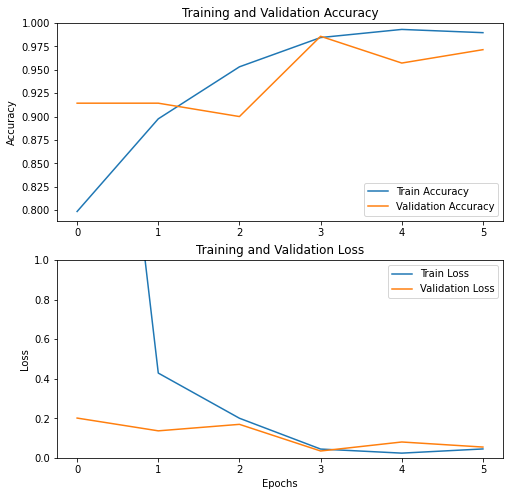

In [35]:
plt.figure(figsize=(8,8))
plt.subplot(2, 1, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')

In [31]:
DATA_DIR = '/home/mintai/capstone/snd/'
DATA_NAME = '187356-1-3-0.wav'
pad2d = lambda a, i: a[:, 0:i] if a.shape[1] > i else np.hstack((a, np.zeros((a.shape[0], i-a.shape[1]))))

wav, sr = librosa.load(DATA_DIR + DATA_NAME, sr=None)
print('sr:', sr)
print('wav shape:', wav.shape)
print('length:', wav.shape[0]/float(sr), 'secs')

mfccs = librosa.feature.mfcc(wav, sr=16000, n_mfcc=100, n_fft=400, hop_length=160)
mms = MinMaxScaler()
print(mms.fit(mfccs))
train_data_mmsed = mms.transform(mfccs)
print(train_data_mmsed)
padded_mfcc = pad2d(mfccs, 40)
padded_mfcc = np.expand_dims(padded_mfcc, 0)

print(padded_mfcc.shape)

sr: 96000
wav shape: (335040,)
length: 3.49 secs
MinMaxScaler()
[[0.         0.         0.         ... 0.         0.         0.        ]
 [1.         0.99999994 1.         ... 0.99999994 1.         1.        ]
 [0.9891101  0.9876489  0.9863989  ... 0.98074764 0.9890952  0.9918186 ]
 ...
 [0.89730996 0.88487655 0.8720379  ... 0.8724134  0.87950236 0.9024741 ]
 [0.8961261  0.8845671  0.8727526  ... 0.87382156 0.87873477 0.9023437 ]
 [0.89441776 0.8835059  0.8732656  ... 0.8744207  0.87797666 0.90281224]]
(1, 100, 40)


In [21]:
test_result = model.predict(padded_mfcc)

print(test_result)

if test_result[0][0]>=test_result[0][1]:
    print(DATA_NAME + ": siren")
else:
    print(DATA_NAME + ': horn')

[[0.12804374 0.8719562  0.        ]]
187356-1-3-0.wav: horn
